# Multiple catchment calibration
simultaneous calibration against multiple catchments using multiple variables

In [1]:
from awrams.calibration.calibration import CalibrationInstance,default_node_settings
from awrams.models import awral
from awrams.utils.metatypes import ObjectDict

import os
import pandas as pd
import pickle

### set path to climate data
path = os.path.join('..','..','test_data','calibration')
awral.CLIMATE_DATA = path

In [2]:
cal = CalibrationInstance(awral)

In [3]:
### catchment ids - shapes are read from shapefile referenced by awrams.utils.settings.CATCHMENT_SHAPEFILE
cal.node_settings.catchment_ids = ['105001', '145003']
cal.node_settings.catchment_extents = pickle.load(open(os.path.join(path,'cal_catchment_extents.pkl'),'rb'))

### evaluation and calibration periods
cal.node_settings.run_period = pd.date_range("1 jan 2005", "31 dec 2010")
cal.node_settings.eval_period = pd.date_range("1 jan 2005", "31 dec 2010")


#### calibration termination criteria

In [4]:
cal.termp.max_shuffle = 1000 # Max shuffling loops
cal.termp.max_iter = 30 #20000 # Max model evaluations
cal.termp.target_score = 1e-8
cal.termp.max_nsni = 5 # Max shuffle without improvement (as defined below)
cal.termp.min_imp = 0.01 # Minimum change required for 'improvement' metric

#### calibration optimizer parameters

In [5]:
cal.hyperp.n_complexes = 5 # initial number of complexes to traverse
cal.hyperp.complex_sz = 5
cal.hyperp.n_evol = 10
cal.hyperp.sub_sz = 2
cal.hyperp.min_complexes = 2

#### worker sub-processes
number of processes forked =  num_nodes X num_workers

In [6]:
cal.num_nodes = 1 #4                   # number of nodes
cal.node_settings.num_workers = 1 #2   # number of workers per node

#### observation data sets

In [7]:
### runoff
cal.node_settings.observations.qtot = ObjectDict()
cal.node_settings.observations.qtot.source_type='csv'
cal.node_settings.observations.qtot.filename = os.path.join(path,'q_obs.csv')

### actual evapotranspiration
cal.node_settings.observations.etot = ObjectDict()
cal.node_settings.observations.etot.source_type='csv'
cal.node_settings.observations.etot.filename = os.path.join(path,'cmrset_obs.csv')

### soil moisture
cal.node_settings.observations.w0 = ObjectDict()
cal.node_settings.observations.w0.source_type='csv'
cal.node_settings.observations.w0.filename = os.path.join(path,'sm_amsre_obs.csv')


#### required model outputs

In [8]:
cal.node_settings.output_variables = ['qtot','etot','w0']
awral.set_outputs({'OUTPUTS_CELL': ['qtot'], 'OUTPUTS_HRU': [], 'OUTPUTS_AVG': ['etot', 'w0']})

#### objective functions

In [9]:
cal.node_settings.objective.localf.classname = 'TestLocalMulti'
cal.node_settings.objective.globalf.classname = 'GlobalMultiEval'
cal.node_settings.objective.localf.filename

'/data/cwd_awra_data/AWRAMSI/IWRM_0042_WP3/GIT/Stuart/cm/gitlab/awrams_cm/calibration/awrams/calibration/objectives/multivar_objectives.py'

#### setup and run calibration

In [10]:
cal.setup_local()
res = cal.run_local()

0 (25): 0.690756594423, 2.66723373273, 9.55258641491, (9.06s)
1 (108): 0.640635453298, 0.887531229573, 1.36470134782, (23.00s)
2 (185): 0.425434971922, 0.591955366365, 0.785663990577, (38.33s)
3 (238): 0.392645395599, 0.454977381123, 0.518025161727, (53.92s)
4 (271): 0.380311376127, 0.413661574407, 0.518025161727, (66.88s)
5 (300): 0.372202628729, 0.390599951417, 0.48917627098, (80.67s)
6 (325): 0.368601194435, 0.372699587441, 0.377941699104, (91.35s)
7 (356): 0.359894408759, 0.365970466011, 0.375375080609, (103.23s)
8 (389): 0.358260694039, 0.362021775843, 0.375375080609, (115.87s)
9 (423): 0.356794013804, 0.358728309068, 0.366040695138, (130.07s)
10 (457): 0.356645857564, 0.357005555938, 0.358107040723, (144.59s)
11 (489): 0.356196008104, 0.356335022886, 0.356494394039, (158.31s)
12 (517): 0.35576568956, 0.356116388915, 0.356459360014, (169.98s)
13 (542): 0.353119268007, 0.355280524774, 0.356196008104, (180.49s)
14 (568): 0.350206231559, 0.353601084284, 0.355672629701, (191.83s)
15 (

In [11]:
# cal.terminate_server()

### examine results

In [12]:
res.get_best()

{'index': 1194, 'parameters': {'fvegref_g_hrusr': 0.1060134195255563, 'sla_hrudr': 25.263071066964155, 'slope_coeff': 0.47197580390845889, 'ne_scale': 0.57888694670225438, 's0max_scale': 2.4900777848595217, 'alb_wet_hrusr': 0.25589650829334093, 'ud0_hrudr': 2.7820396251726995, 'k_rout_int': 2.0227797164167227, 's_sls_hrusr': 0.46138620992633889, 'w0lime_hrusr': 0.86603528435023314, 'lairef_hrusr': 1.3552259051828635, 'vc_hrusr': 0.22021203100799555, 's_sls_hrudr': 0.068606832527143405, 'fsoilemax_hrudr': 0.69941552147909569, 'lairef_hrudr': 2.423633492030639, 'tgrow_hrudr': 594.2987503283548, 'sla_hrusr': 34.26137328392867, 'alb_wet_hrudr': 0.36193547019750283, 'wslimu_hrudr': 0.40296701156478937, 'wslimu_hrusr': 0.3049991730041573, 'w0lime_hrudr': 0.70616623885121854, 'alb_dry_hrudr': 0.24808087411253221, 'alb_dry_hrusr': 0.20249527522139904, 'tgrow_hrusr': 655.39938680697355, 'k_rout_scale': 2.036700653288062, 'gfrac_max_hrudr': 0.45618629871185079, 'pref_gridscale': 1.89448206246519

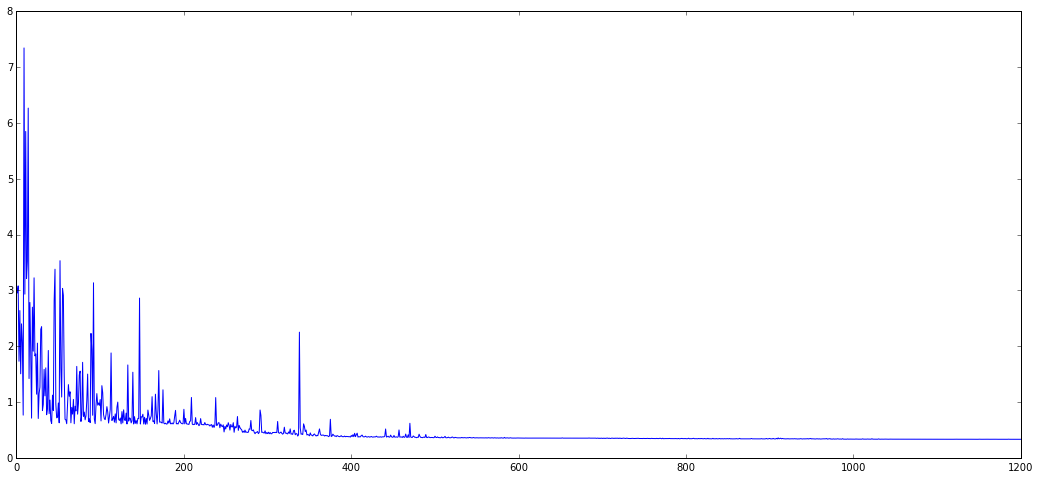

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(res.global_score)

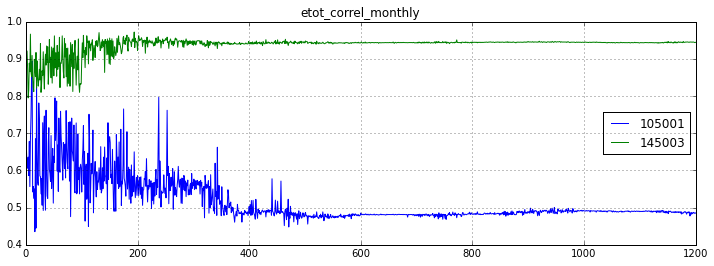

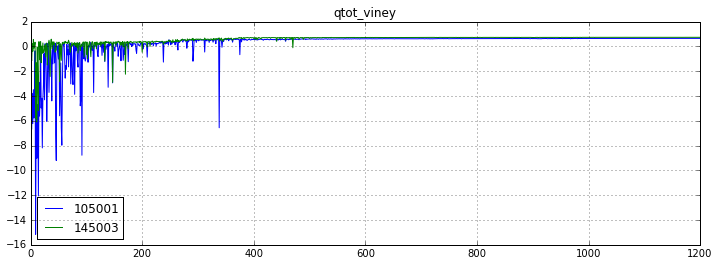

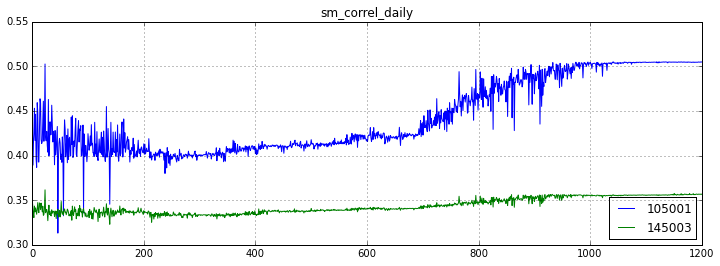

In [14]:
local_res = {}
for k in res.local_schema:
    local_res[k] = res.get_local_scores(k)
    fig = plt.figure(figsize=(12,4))
    local_res[k].plot(title=k, ax=fig.gca())

### examine saved results file

In [15]:
import h5py
# h5py.enable_ipython_completer() ### allows tab completion on variable name keys

h = h5py.File('calibration.h5')

In [16]:
list(h.keys())

['global_score', 'local_scores', 'parameter_name', 'parameter_values']

In [17]:
parameter_names = list(map(lambda s: s.decode(),h['parameter_name'][:]))
parameter_names

['sla_hrudr',
 'alb_wet_hrusr',
 'k_rout_int',
 'alb_dry_hrudr',
 'lairef_hrusr',
 'vc_hrusr',
 'fsoilemax_hrudr',
 'sla_hrusr',
 'sdmax_scale',
 'wslimu_hrusr',
 'kr_coeff',
 'k_rout_scale',
 'pref_gridscale',
 'k_gw_scale',
 'er_frac_ref_hrudr',
 'gfrac_max_hrusr',
 'rd_hrudr',
 'fvegref_g_hrudr',
 'w0ref_alb_hrusr',
 'vc_hrudr',
 'kdsat_scale',
 'wdlimu_hrusr',
 'kssat_scale',
 'ud0_hrusr',
 'tsenc_hrusr',
 'wslimu_hrudr',
 'fvegref_g_hrusr',
 'ne_scale',
 'rd_hrusr',
 'ud0_hrudr',
 's_sls_hrusr',
 's_sls_hrudr',
 'k0sat_scale',
 'lairef_hrudr',
 'tgrow_hrudr',
 'alb_wet_hrudr',
 's0max_scale',
 'w0lime_hrudr',
 'w0lime_hrusr',
 'alb_dry_hrusr',
 'tgrow_hrusr',
 'gfrac_max_hrudr',
 'wdlimu_hrudr',
 'ssmax_scale',
 'us0_hrudr',
 'us0_hrusr',
 'slope_coeff',
 'cgsmax_hrusr',
 'tsenc_hrudr',
 'fsoilemax_hrusr',
 'w0ref_alb_hrudr',
 'cgsmax_hrudr']

In [18]:
h['global_score'].shape

(1201,)

In [19]:
h['parameter_values'].shape

(1201, 52)

In [20]:
h['parameter_values'][0,:]

array([  3.41184791e+00,   2.74652810e-01,   2.96709137e+00,
         4.71892992e-01,   2.04273240e+00,   9.38754602e-01,
         8.01608112e-01,   1.74515345e+00,   7.19060362e-01,
         3.43825311e-01,   8.21903045e-01,   7.84308920e-01,
         2.10340926e+00,   5.59945948e+00,   1.00918507e-01,
         3.45900453e-01,   5.59292287e+00,   1.29671817e-01,
         2.55325617e-01,   7.46149363e-01,   6.79551312e-01,
         4.53943101e-01,   1.23344032e+00,   4.48392070e+00,
         1.33306742e+02,   2.16033312e-01,   1.00942418e-01,
         6.73161238e-01,   1.32871637e+00,   3.90218778e+00,
         3.46457117e-01,   2.80087552e-01,   3.06459214e+00,
         1.49662936e+00,   8.78745257e+02,   4.89072815e-01,
         2.74902359e+00,   7.71899963e-01,   6.20445636e-01,
         2.58854014e-01,   2.30189442e+02,   2.74522855e-01,
         2.86197874e-01,   1.29837401e+00,   4.57626408e+00,
         4.04339219e+00,   3.28610929e-01,   3.70072195e-02,
         2.43174649e+01,

In [21]:
best_score_idx = h['global_score'][:].argmin()
best_parameters = {k:v for k,v in zip(parameter_names,h['parameter_values'][best_score_idx,:])}
best_parameters

{'alb_dry_hrudr': 0.24808087411253221,
 'alb_dry_hrusr': 0.20249527522139904,
 'alb_wet_hrudr': 0.36193547019750283,
 'alb_wet_hrusr': 0.25589650829334093,
 'cgsmax_hrudr': 0.026103131168016509,
 'cgsmax_hrusr': 0.045528751168519239,
 'er_frac_ref_hrudr': 0.040356550215653327,
 'fsoilemax_hrudr': 0.69941552147909569,
 'fsoilemax_hrusr': 0.94876124376499471,
 'fvegref_g_hrudr': 0.15119978593968844,
 'fvegref_g_hrusr': 0.1060134195255563,
 'gfrac_max_hrudr': 0.45618629871185079,
 'gfrac_max_hrusr': 0.45913874111227382,
 'k0sat_scale': 0.10168222977424364,
 'k_gw_scale': 0.80754962097672023,
 'k_rout_int': 2.0227797164167227,
 'k_rout_scale': 2.036700653288062,
 'kdsat_scale': 0.010035985736909623,
 'kr_coeff': 0.34989804221565046,
 'kssat_scale': 9.4040975873378088,
 'lairef_hrudr': 2.423633492030639,
 'lairef_hrusr': 1.3552259051828635,
 'ne_scale': 0.57888694670225438,
 'pref_gridscale': 1.8944820624651948,
 'rd_hrudr': 3.1282257399635403,
 'rd_hrusr': 1.3918950160940959,
 's0max_scale

In [32]:
# from awrams.simulation.ondemand import OnDemandSimulator as ods
# import awrams.utils.catchments as catchments

# sdb = catchments.ShapefileDB()
# catchment = sdb._get_by_field('StationID',cal.node_settings.catchment_ids[0])

# ns = default_node_settings(awral)
# sim = ods(awral,ns['inputs'].mapping)

# for k,v in best_parameters.items():
#     sim.input_runner.input_graph[k]['exe'].value = v

# sim_results = sim.run(cal.node_settings.eval_period,catchment)